In [1]:
import numpy as np

from sigllm.forecasting import Signal2String, HF

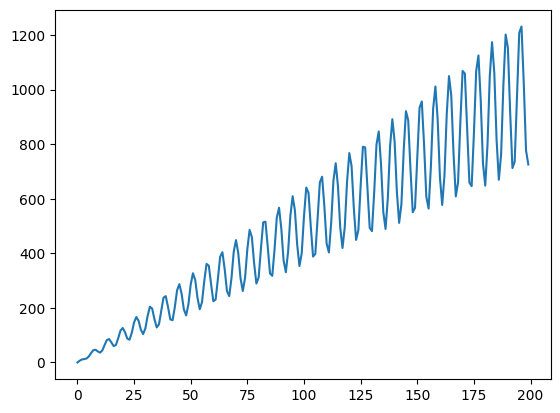

In [2]:
import matplotlib.pyplot as plt

t = list(range(0, 200))

timeseries = []
for x in t:
    res = x * np.sin(x) + x * np.cos(x) + 5*x
    timeseries.append(res)

timeseries = np.array(timeseries)
plt.plot(t, timeseries);

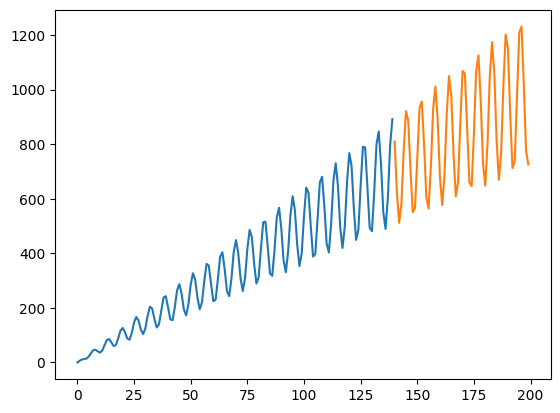

In [3]:
stop = int(np.ceil(0.7 * len(timeseries)))

train, test = timeseries[:stop], timeseries[stop:]

plt.plot(t[:stop], train)
plt.plot(t[stop:], test);

In [4]:
converter = Signal2String(decimal=0, sep=',', space=False)

train_str = converter.transform(train) ## TODO: add seperator to the end and remove it from gpt.py

In [5]:
model_name = 'mistralai/Mistral-7B-Instruct-v0.2'

model = HF(model_name, converter.sep)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [32]:
output = model.forecast(train_str, steps=len(test)+40) ## TODO: fix length error

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [33]:
output

[',849,744,604,605,756,905,978,874,766,628,611,720,894,1037,1073,1057,886,768,809,1017,1213,1133,1061,918,728,808,917,1119,1175,1247,1291,1356,1398,1477,1544,1493,1283,1175,1266,1411,1536,1441,1621,1685,1722,1607,1448,1382,1547,1663,1629,1471,1274,1398,1396,1377,1362,1464,1634,1676,1544,1353,1396,1519']

In [35]:
converter.reverse_transform(output[0])

array([ 849.,  744.,  604.,  605.,  756.,  905.,  978.,  874.,  766.,
        628.,  611.,  720.,  894., 1037., 1073., 1057.,  886.,  768.,
        809., 1017., 1213., 1133., 1061.,  918.,  728.,  808.,  917.,
       1119., 1175., 1247., 1291., 1356., 1398., 1477., 1544., 1493.,
       1283., 1175., 1266., 1411., 1536., 1441., 1621., 1685., 1722.,
       1607., 1448., 1382., 1547., 1663., 1629., 1471., 1274., 1398.,
       1396., 1377., 1362., 1464., 1634., 1676., 1544., 1353., 1396.,
       1519.])

In [36]:
len(converter.reverse_transform(output[0]))

64

In [12]:
def plot_results(x, title=None):
    median = np.median(x, axis=0)
    lower = np.quantile(x, 0.05, axis=0)
    upper = np.quantile(x, 0.95, axis=0)
    
    plt.plot(t[:stop], train)
    plt.plot(t[stop:], test, color='green', label='true')
    
    plt.plot(t[stop:], median, color='purple', label='pred');
    plt.fill_between(t[stop:], lower, upper, alpha=0.3, color='purple')

    if title:
        plt.title(title)
    
    plt.legend();

In [37]:
pred = []
for sample in output:
    pred.append(converter.reverse_transform(sample, trunc=len(test)))

pred = np.array(pred)

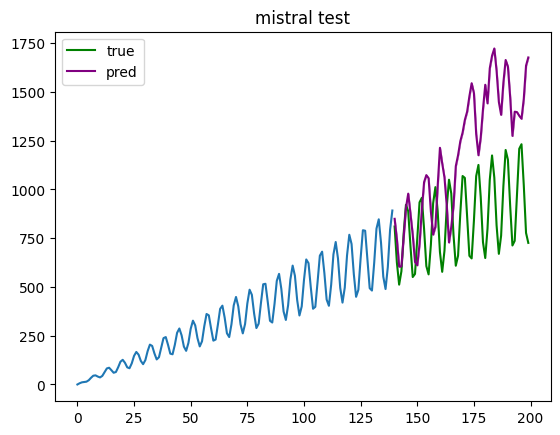

In [38]:
plot_results(pred, title='mistral test')